1.Observing prices and calculate returns using data from yahoo finance  
2.percentage returns  
3.log-returns  
4.lagged log-returns  

In [134]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import requests
import io
import time
from os.path import isfile
import requests_html
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

now = datetime.datetime.now()

In [83]:
#install yahoo_fin
from yahoo_fin.stock_info import *

#Compare share prices using chart

In [128]:
apple=get_data("AAPL",'01/01/2009','01/01/2019',index_as_date=False)
apple.head()

,date,open,high,low,close,adjclose,volume,ticker
0,2018-12-31,158.529999,159.360001,156.479996,157.740005,156.463837,35003500.0,AAPL
1,2018-12-28,157.500000,158.520004,154.550003,156.229996,154.966034,42291400.0,AAPL
2,2018-12-27,155.839996,156.770004,150.070007,156.149994,154.886688,53117100.0,AAPL
3,2018-12-26,148.300003,157.229996,146.720001,157.169998,155.898438,58582500.0,AAPL
4,2018-12-24,148.149994,151.550003,146.589996,146.830002,145.642090,37169200.0,AAPL


In [129]:
google=get_data("GOOG",'01/01/2009','01/01/2019',index_as_date=False)
google.head()

,date,open,high,low,close,adjclose,volume,ticker
0,2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300.0,GOOG
1,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800.0,GOOG
2,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800.0,GOOG
3,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300.0,GOOG
4,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300.0,GOOG


In [130]:
apple_d=apple["date"]
google_d=google["date"]
apple_p=apple["adjclose"]
google_p=google["adjclose"]

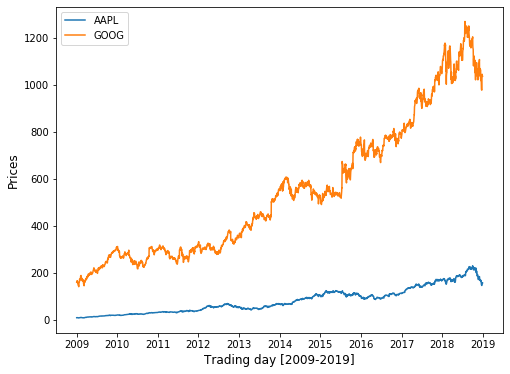

In [122]:
#visualise share price trend aross the period
plt.figure(figsize=(8, 6))
plt.plot_date(apple_d, apple_p, label="AAPL", ls="-", marker='None')
plt.plot_date(google_d, google_p, label="GOOG", ls="-", marker='None')
plt.xlabel("Trading day [2009-2019]", fontsize=12)
plt.ylabel("Prices", fontsize=12)
plt.legend()

Calculate % returns for shares

In [137]:
apple_ret = apple_p.pct_change().rolling(252).mean()
google_ret = google_p.pct_change().rolling(252).mean()


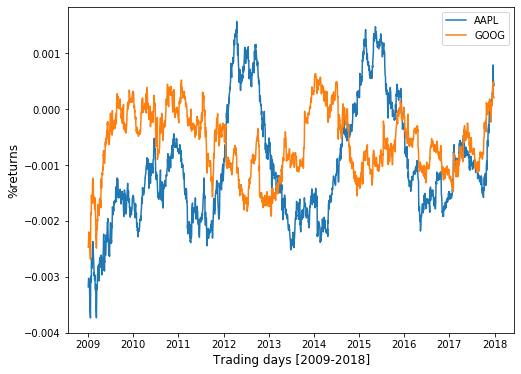

In [144]:
plt.figure(figsize=(8, 6))
plt.plot_date(apple_d, apple_ret, label="AAPL", ls="-", marker="None")
plt.plot_date(google_d, google_ret, label="GOOG", ls="-", marker="None")
plt.xlabel('Trading days [2009-2018]', fontsize=12)
plt.ylabel('%returns', fontsize=12)
plt.legend()

Calculate log returns

In [153]:
lr_apple = np.log(apple_p)-np.log(apple_p.shift(1))
lr_google = np.log(google_p)-np.log(google_p.shift(1))


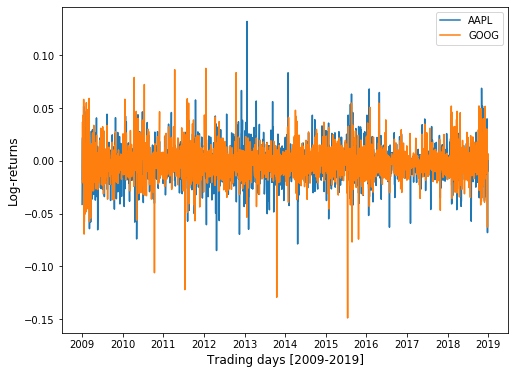

In [154]:
plt.figure(figsize=(8, 6))
plt.plot_date(apple_d, lr_apple, label="AAPL", ls="-", marker="None")
plt.plot_date(google_d, lr_google, label="GOOG", ls="-", marker="None")
plt.xlabel('Trading days [2009-2019]', fontsize=12)
plt.ylabel('Log-returns', fontsize=12)
plt.legend()

Histograms of the log-returns

In [157]:
#remember to drop missing values (first quote) after calculating returns
lr_apple=lr_apple.dropna(axis=0)
lr_google=lr_google.dropna(axis=0)

(0, 30)

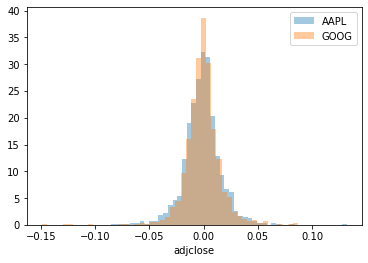

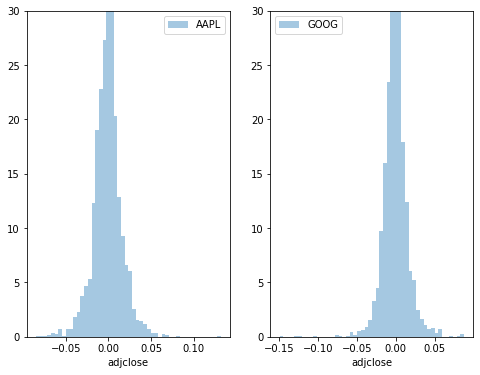

In [158]:
sns.distplot(lr_apple, kde=False, norm_hist=True, label="AAPL")
sns.distplot(lr_google, kde=False, norm_hist=True, label="GOOG")

plt.legend()
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.distplot(lr_apple, kde=False, norm_hist=True, label="AAPL")
plt.ylim([0, 30])
plt.legend()
plt.subplot(1, 2, 2)
sns.distplot(lr_google, kde=False, norm_hist=True, label="GOOG")
plt.legend()
plt.ylim([0, 30])

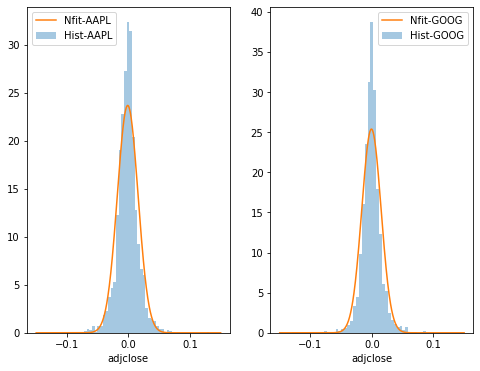

In [162]:
from scipy.stats import norm
x = np.linspace(-.15, .15, 500)
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
lr = lr_apple
mu, sigma = norm.fit(lr)
sns.distplot(lr, kde=False, norm_hist=True, label="Hist-AAPL")
plt.plot(x, norm.pdf(x, mu, sigma), label="Nfit-AAPL")
plt.legend(loc="upper left")
plt.subplot(1, 2, 2)
lr = lr_google
mu, sigma = norm.fit(lr)
sns.distplot(lr, kde=False, norm_hist=True, label="Hist-GOOG")
plt.plot(x, norm.pdf(x, mu, sigma), label="Nfit-GOOG")
plt.legend()

In [195]:
# inline function to compute the lagged-log returns for an arbitrary lag
def lagged_log(price,lag):
    lagged= np.log(price)-np.log(price.shift(lag))
    lagged_cleaned=lagged.dropna(axis=0) #drop the first few missing values after calculating log returns
    return lagged_cleaned


In [198]:
# compute the log-returns corresponding to ratios over 5 quotes
llr_apple = lagged_log(apple_p, 5)
llr_google = lagged_log(google_p, 5)

In [199]:
llr_apple.head(10)

5    -0.045458
6     0.003833
7     0.029904
8     0.055081
9     0.110225
10    0.093360
11    0.086209
12    0.049769
13    0.015298
14    0.033942
Name: adjclose, dtype: float64

In [200]:
llr_google.head(10)

5    -0.055663
6    -0.027043
7    -0.020195
8    -0.010396
9     0.040462
10    0.061910
11    0.050694
12    0.038985
13    0.022150
14    0.022393
Name: adjclose, dtype: float64

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


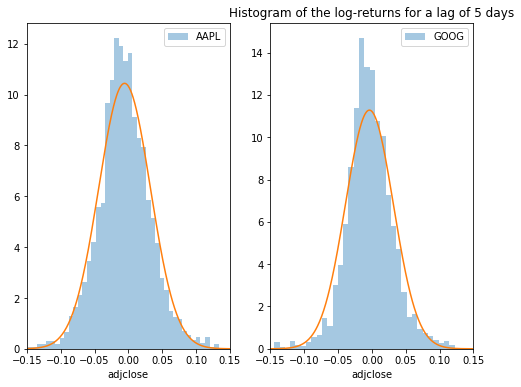

In [201]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.distplot(llr_apple, kde=False, norm_hist=True, label="AAPL")
plt.xlim([x.min(), x.max()])
plt.legend()
plt.subplot(1, 2, 2)
sns.distplot(llr_google, kde=False, norm_hist=True, label="GOOG")
plt.xlim([x.min(), x.max()])
plt.legend()
plt.title('Histogram of the log-returns for a lag of 5 days')
mu, sigma = norm.fit(llr_apple)
plt.subplot(1, 2, 1)
plt.plot(x, norm.pdf(x, mu, sigma))
mu, sigma = norm.fit(llr_google)
plt.subplot(1, 2, 2)
plt.plot(x, norm.pdf(x, mu, sigma))


The form of the histogram stays the same. 
However,
the horizontal spread of the histogram (i.e., the variance) increases: the uncertainty is related to time.

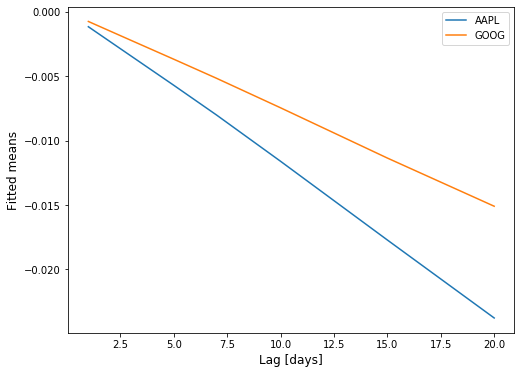

In [202]:
#visualisation of log returns with a lag of a range of days

lags = np.array([1, 3, 5, 7, 10, 15, 20])
sig_apple = np.zeros(len(lags))
mu_apple = np.zeros(len(lags))
sig_google = np.zeros(len(lags))
mu_google = np.zeros(len(lags))
i = 0

for lag in lags:
    mu_apple[i], sig_apple[i] = norm.fit(lagged_log(apple_p, lag))
    mu_google[i], sig_google[i] = norm.fit(lagged_log(google_p, lag))
    
    i+=1
plt.figure(figsize=(8, 6))
plt.plot(lags, mu_apple, label="AAPL")
plt.plot(lags, mu_google, label="GOOG")
plt.xlabel("Lag [days]", fontsize=12)
plt.ylabel("Fitted means", fontsize=12)
plt.legend()

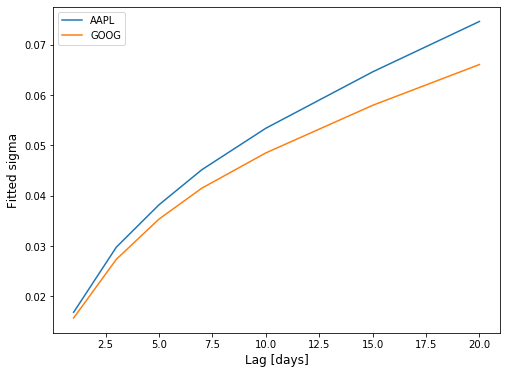

In [203]:
plt.figure(figsize=(8, 6))
plt.plot(lags, sig_apple, label="AAPL")
plt.plot(lags, sig_google, label="GOOG")
plt.xlabel("Lag [days]", fontsize=12)
plt.ylabel("Fitted sigma", fontsize=12)
plt.legend()

log-returns distribution using t-stat

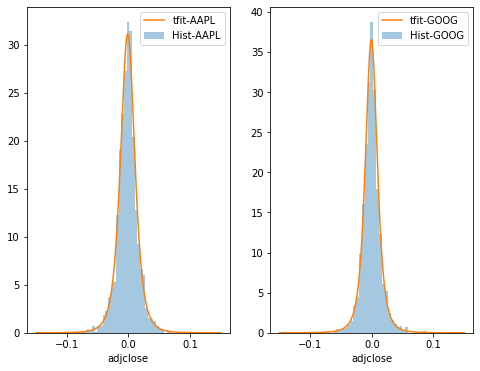

In [206]:
from scipy.stats import t
plt.figure(figsize=(8, 6))
lr = lr_apple
df, loc, scale = t.fit(lr)
plt.subplot(1, 2, 1)
sns.distplot(lr, kde=False, norm_hist=True, label="Hist-AAPL")
plt.plot(x, t.pdf(x, df, loc, scale), label="tfit-AAPL")
plt.legend()
lr = lr_google
df, loc, scale = t.fit(lr)
plt.subplot(1, 2, 2)
sns.distplot(lr, kde=False, norm_hist=True, label="Hist-GOOG")
plt.plot(x, t.pdf(x, df, loc, scale), label="tfit-GOOG")
plt.legend(loc="upper right")

t stat fits better.
